Импорт библиотек Python

In [1]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from PIL import Image
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

Загрузка файла, отображение датафрейма

In [2]:
lunar = pd.read_table('lunar_finale.csv', na_values='NA', delimiter=',')
lunar

,Unnamed: 0,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m),Latitude3,Longitude3,Time JD
0,0,46437,-49456,17,0,9,-1.0981,0.8791,-0.1922,268.8,0.0,0.0,-24,-22,9.911001e+05
1,1,46427,-49451,-16,0,0,-1.1155,0.8143,-0.1921,233.4,0.0,0.0,15,-98,9.912483e+05
2,2,46416,-49445,-11,4,3,0.8988,1.2105,0.2069,281.7,102.7,0.0,-13,89,9.914247e+05
3,3,46404,-49439,-6,4,0,-0.4644,2.0382,0.9740,343.4,200.8,0.0,12,113,9.916027e+05
4,4,46392,-49433,-1,6,7,0.1003,2.6513,1.6963,322.8,213.5,98.2,-11,-92,9.917793e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12059,12059,4417,12360,166,4,9,0.4971,1.9853,0.9069,356.7,204.2,0.0,-20,178,2.816563e+06
12060,12060,4421,12366,171,5,4,-0.4669,1.9868,1.0153,308.0,189.1,18.5,18,124,2.816740e+06
12061,12061,4424,12372,176,0,9,1.2117,0.6604,-0.3907,230.6,0.0,0.0,-17,153,2.816918e+06
12062,12062,4427,12377,143,2,1,1.5497,0.0329,-1.0039,53.5,0.0,0.0,6,118,2.817065e+06


*   Категориальные переменные: Eclipse type; Lunation Number; Saros Number; Quincena Solar Eclipse; Latitude3; Longitude3
* Непрерывные: остальные


*   Отбираю переменные для лабораторной работы
  *   Непрерывные: gamma (V1); penumbral magnitude (V2); penumbral eclipse duration (m) (V3);
  *   Дискретные: Quincena Solar Eclipse (V4); latitude3 (V5); longitude3 (V6); 
  *   Целевая переменная: Total Eclipse Duration (m) (V7);



In [3]:
X=lunar[['Gamma','Penumbral Magnitude', 'Penumbral Eclipse Duration (m)', 'Quincena Solar Eclipse', 'Latitude3', 'Longitude3']]
y=lunar['Total Eclipse Duration (m)']
X.columns = ["V"+str(i) for i in range(1, len(X.columns)+1)]
data=X
data['V7']=pd.Series(y)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,V1,V2,V3,V4,V5,V6,V7
0,-1.0981,0.8791,268.8,9,-24,-22,0.0
1,-1.1155,0.8143,233.4,0,15,-98,0.0
2,0.8988,1.2105,281.7,3,-13,89,0.0
3,-0.4644,2.0382,343.4,0,12,113,0.0
4,0.1003,2.6513,322.8,7,-11,-92,98.2


Непараметрическая оценка функция плотности распределния случайных величин в виде гистограм и kde

<Figure size 720x360 with 0 Axes>

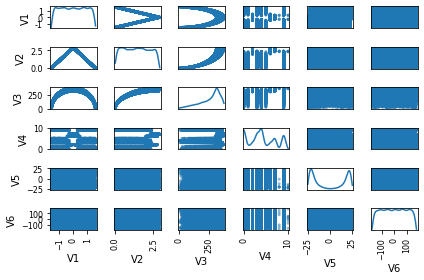

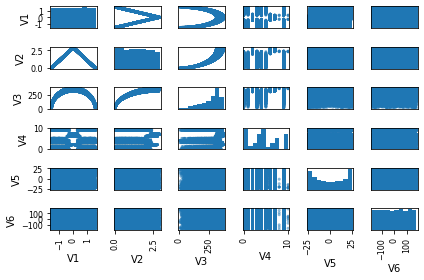

In [6]:
plt.figure(figsize=(10, 5))
pd.plotting.scatter_matrix(data.loc[:, "V1":"V6"], diagonal="kde")
plt.tight_layout()
plt.show()
pd.plotting.scatter_matrix(data.loc[:, "V1":"V6"], diagonal="hist")
plt.tight_layout()
plt.show()


Оценка вектора математического ожидания, диагональных элементов матрицы ковариации и самой матрицы ковариации

In [9]:
MEAN=X.apply(np.mean)
STD=X.apply(np.std)
MX=[]
DX=[]
for i in range(len(MEAN)-1):
  MX.append(MEAN[i])
  DX.append(STD[i]**2)
print('Mathematical expactation =',MX)
print('Variance =',DX)

Mathematical expactation = [0.0024900116047745385, 1.4186558189655185, 269.9719413129976, 4.05487400530504, -0.32020888594164454, 0.1443136604774536]
Variance = [0.828951005897408, 0.692604433381257, 6390.7442002764055, 8.951398657864244, 276.1470518131455, 10809.595469986423]


In [10]:
R=X.cov()
R.loc["V1":"V6", "V1":"V6"]

,V1,V2,V3,V4,V5,V6
V1,0.829020,-0.003915,-0.613209,-0.001145,0.879921,-0.026467
V2,-0.003915,0.692662,60.177305,0.559176,0.011346,-0.179882
V3,-0.613209,60.177305,6391.273981,54.707948,10.047825,-17.589203
V4,-0.001145,0.559176,54.707948,8.952141,-3.633924,2.993241
V5,0.879921,0.011346,10.047825,-3.633924,276.169944,-8.720179
V6,-0.026467,-0.179882,-17.589203,2.993241,-8.720179,10810.491565


Непараметрические оценки условных распределений + условные мат.ожидания и условные ковариации (относительно переменной V4)

In [11]:
X['V7//10']=X.V7//10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cond_MX=[]
cond_std=[]
for el in X['V4'].unique():
  class2data= X[X['V4']==el]
  cond_MX.append(class2data.loc[:,['V1','V2','V3','V5','V6']].apply(np.mean))
  cond_std.append(class2data.loc[:,['V1','V2','V3','V5','V6']].apply(np.std))
print(cond_MX)
print(cond_std)

In [13]:
MX_cond=pd.DataFrame(cond_MX)
MX_cond['V4']=X['V4'].unique()
MX_sort = MX_cond.sort_index().sort_values('V4', kind='mergesort')
MX_sort.columns=[['MX(V1)','MX(V2)','MX(V3)','MX(V5)','MX(V6)','V4']]
MX_sort

,MX(V1),MX(V2),MX(V3),MX(V5),MX(V6),V4
1,-0.004692,1.068732,236.125941,0.862809,0.178875,0
8,0.102925,1.020664,247.810704,0.222535,-3.230986,1
7,-0.001708,2.372049,330.054105,4.075370,-2.768506,2
2,-0.001965,1.102117,264.355792,-2.829323,-0.628987,3
4,0.000080,1.077610,237.044772,0.917239,-1.331853,4
6,-0.016236,0.882859,235.319820,0.072072,9.642643,5
5,0.006793,2.377991,330.488251,4.757009,0.479306,6
3,0.003368,2.675457,352.222717,-3.028211,0.567929,7
10,0.005533,2.343600,366.950000,-15.333333,-11.500000,8
0,0.003384,1.117867,265.797036,-3.118568,2.581655,9


In [14]:
STD=pd.DataFrame(cond_std)
STD['V4']=X['V4'].unique()
STD_sort = STD.sort_index().sort_values('V4', kind='mergesort')
STD_sort.columns=[['STD(V1)','STD(V2)','STD(V3)','STD(V5)','STD(V6)','V4']]
STD_sort

,STD(V1),STD(V2),STD(V3),STD(V5),STD(V6),V4
1,1.029125,0.628918,73.543354,16.610087,103.986101,0
8,1.055304,0.590091,77.040406,16.486736,103.673337,1
7,0.281500,0.174189,16.878362,16.041827,103.789116,2
2,1.037978,0.653036,82.797499,16.454290,104.108637,3
4,1.024157,0.627042,73.912845,16.636658,103.825572,4
6,1.121452,0.522350,72.676381,16.202386,104.365500,5
5,0.278437,0.174365,17.613352,16.001826,103.384908,6
3,0.132705,0.134550,19.187090,16.258741,103.974850,7
10,0.299524,0.029999,3.283164,7.015855,129.386694,8
0,1.030837,0.656542,82.941474,16.322650,104.104515,9


Оценка парных коэффициентов корреляции, доверительных интервалов для них и уровней значимости

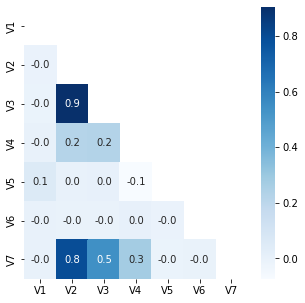

In [15]:
X_predictors=X.drop(['V7//10'], axis=1)
mask = np.zeros_like(X_predictors.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(X_predictors.corr(), mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

In [19]:
ar=[]
vars=[]
corr_coefs=[]
p_values=[]
lo_zs=[]
hi_zs=[]
for icol in X_predictors.columns:
  for jcol in X_predictors.columns:
    if (icol<jcol):
      x = X[icol].apply(lambda x: float(x))
      y = X[jcol].apply(lambda x: float(x))
      r, p = stats.pearsonr(x,y)
      r_z = np.arctanh(r)
      se = 1/np.sqrt(x.size-3)
      alpha = 0.05
      z = stats.norm.ppf(1-alpha/2)
      lo_z, hi_z = r_z-z*se, r_z+z*se
      vars.append((icol,jcol))
      corr_coefs.append(r)
      p_values.append(p)
      lo_zs.append((np.exp(2*lo_z)-1)/(np.exp(2*lo_z)+1))
      hi_zs.append((np.exp(2*hi_z)-1)/(np.exp(2*hi_z)+1))
d= {'Variables': vars, 'Correlation Coefficient': corr_coefs, 'p-value': p_values, 'lo_z': lo_zs, 'hi_z': hi_zs}
pd.DataFrame(data=d)

,Variables,Correlation Coefficient,p-value,lo_z,hi_z
0,"(V1, V2)",-0.005166,5.704512e-01,-0.023009,0.012680
1,"(V1, V3)",-0.008424,3.548565e-01,-0.026265,0.009422
2,"(V1, V4)",-0.000420,9.631876e-01,-0.018265,0.017425
3,"(V1, V5)",0.058153,1.636533e-10,0.040350,0.075919
4,"(V1, V6)",-0.000280,9.755052e-01,-0.018124,0.017565
5,"(V1, V7)",-0.000448,9.607651e-01,-0.018293,0.017397
6,"(V2, V3)",0.904437,0.000000e+00,0.901136,0.907633
7,"(V2, V4)",0.224556,9.707553e-138,0.207543,0.241433
8,"(V2, V5)",0.000820,9.282129e-01,-0.017025,0.018665
9,"(V2, V6)",-0.002079,8.194130e-01,-0.019923,0.015767



*   Задача регрессии: предсказать суммарную длительность лунных затмений на основе имеющихся данных
*   Ищем множественный коэффициент корреляции суммарной длительности затмения и других переменных



In [ ]:
R=X_predictors.corr()
Alg=R.drop('V7', axis=0)
Alg=Alg.drop('V7',axis=1)
deter=np.linalg.det(R)
comp=np.linalg.det(Alg)
R0=np.sqrt(1-deter/comp)
print(R0)

0.9018378147954862


Регрессия: линейная модель

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_predictors.drop(['V7'],axis=1), y, test_size=0.33, random_state=42)
x = []
for i in range(len(y_test)):
    x.append(i)

reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test,y_pred)
print('Mean absolute percentage error = ', mape)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
print('R2 = ', r2)

Mean absolute percentage error =  inf
Mean absolute error =  13.604762914180379
Mean squared error =  282.15912610409447
R2 =  0.807981780090305


Text(0, 0.5, 'Total eclipse duration')

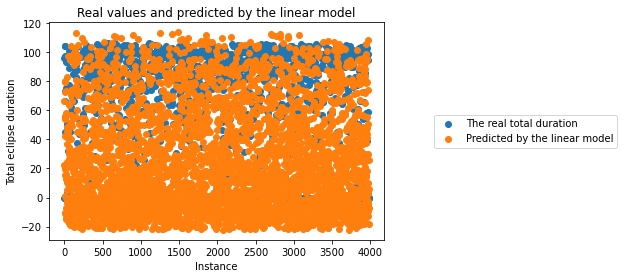

In [22]:
plt.scatter(x, y_test, label = u'The real total duration')
plt.scatter(x, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Instance')
plt.ylabel(u'Total eclipse duration')

Полиномиальная модель

In [23]:
poly = PolynomialFeatures(6)
X_train_new = poly.fit_transform(X_train)
poly = PolynomialFeatures(6)
X_test_new = poly.fit_transform(X_test)
reg = LinearRegression(normalize=True)
reg.fit(X_train_new, y_train)
y_pred_poly = reg.predict(X_test_new)
X_new = poly.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [24]:
r2=sklearn.metrics.r2_score(y_test,y_pred_poly)
print('R2 = ', r2)
mae = mean_absolute_error(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred_poly)
print('Mean absolute percentage error = ', mape)

R2 =  0.987979375459047
Mean absolute error =  2.6460672875835116
Mean squared error =  17.66357857757364
Mean absolute percentage error =  inf


Text(0, 0.5, 'Total eclipse duration')

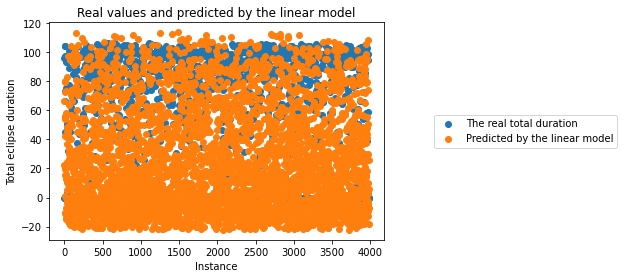

In [ ]:
plt.scatter(x, y_test, label = u'The real total duration')
plt.scatter(x, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Instance')
plt.ylabel(u'Total eclipse duration')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


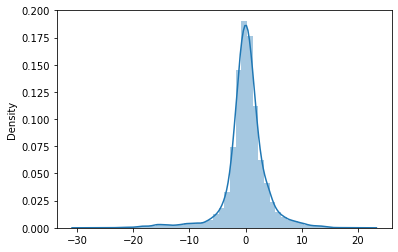

In [25]:
X_new1 = poly.fit_transform(X_predictors.drop('V7',axis=1))
y1 = np.array(y)
y_pred_all = np.array(reg.predict(X_new1))
y2 = np.array(y_pred_all)
y_diff = y1[:] - y2[:]
sns.distplot(y_diff, kde=True)

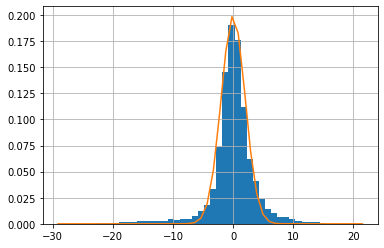

In [26]:
from scipy.stats.distributions import norm
pd.Series(y_diff).hist(density=True, bins=50)
plt.plot(np.linspace(np.min(y_diff), np.max(y_diff)), norm.pdf(np.linspace(np.min(y_diff), np.max(y_diff)), 0.023, 2))

In [27]:
import scipy.stats
params1 = scipy.stats.norm.fit(y_diff)
params1 = (params1[0], 2)
ks = scipy.stats.kstest(y_diff, 'norm', params1, N=100)
chi2 = scipy.stats.chisquare(y_diff)
print(ks)
print(chi2)

KstestResult(statistic=0.06864894258060572, pvalue=8.288951762917262e-50)
Power_divergenceResult(statistic=7711910.310122971, pvalue=0.0)


In [28]:
from scipy.stats import shapiro
shap = scipy.stats.shapiro(y_diff)
print(shap)

(0.8649696707725525, 0.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


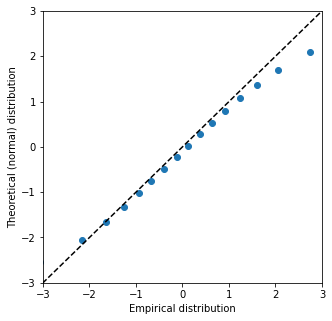

In [31]:
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
x=np.linspace(-10,10)
# Calculation of quantiles
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(y_diff, percs)
qn_norm = scipy.stats.norm.ppf(percs / 100.0, *params1)

# Building a quantile biplot
plt.figure(figsize=(5, 5))
plt.plot(qn_first, qn_norm, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (normal) distribution')

plt.show()

Регрессия с регуляризацией

In [ ]:
from sklearn.linear_model import RidgeCV
X_train, X_test, y_train, y_test = train_test_split(X_predictors.drop(['V7'],axis=1), y, test_size=0.33, random_state=42)
clf = RidgeCV(alphas=[0.1, 1.0, 10.0]).fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [ ]:
print(clf.score(X_train, y_train))
print(clf.score(X_test,y_test))

0.8158588489810465
0.8079830826961745


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test,y_pred)
print('Mean absolute percentage error = ', mape)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
print('R2 = ', r2)

Mean absolute percentage error =  inf
Mean absolute error =  13.604665684209301
Mean squared error =  282.15721200378704
R2 =  0.8079830826961744


Анализ главных компонент

In [ ]:
X_pca=X_predictors.drop('V7',axis=1)
X_pca.head()

,V1,V2,V3,V4,V5,V6
0,-1.0981,0.8791,268.8,9,-24,-22
1,-1.1155,0.8143,233.4,0,15,-98
2,0.8988,1.2105,281.7,3,-13,89
3,-0.4644,2.0382,343.4,0,12,113
4,0.1003,2.6513,322.8,7,-11,-92


In [ ]:
scaler=StandardScaler()
scaler.fit(X_pca)
X_pca=scaler.transform(X_pca)
X_pca

In [ ]:
pca=PCA(n_components=6)
pca.fit(X_pca)
x_pca=pca.transform(X_pca)
x_pca.shape

(12064, 6)

Text(0, 0.5, 'Second comp')

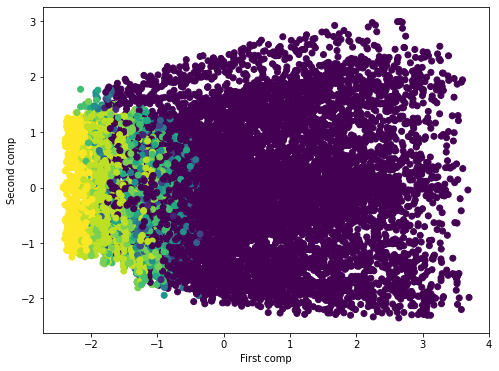

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=X['V7//10'])
plt.xlabel('First comp')
plt.ylabel('Second comp')

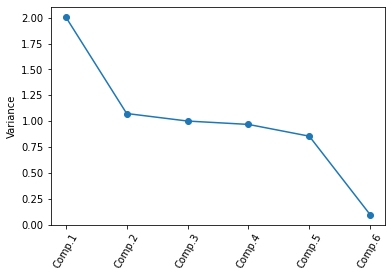

In [ ]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
screeplot(pca, X_pca)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)
x = []
for i in range(len(y_test)):
    x.append(i)

reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = sklearn.metrics.r2_score(y_test,y_pred)
print('Mean absolute percentage error = ', mape)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)
print('R2 = ', r2)

Mean absolute percentage error =  inf
Mean absolute error =  13.604762914180373
Mean squared error =  282.1591261040944
R2 =  0.8079817800903051


Text(0, 0.5, 'Total eclipse duration')

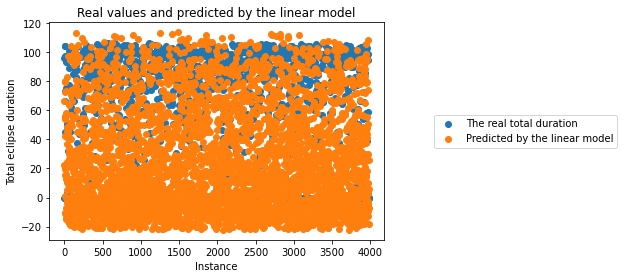

In [ ]:
plt.scatter(x, y_test, label = u'The real total duration')
plt.scatter(x, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Instance')
plt.ylabel(u'Total eclipse duration')